# Intro To Pandas by analyzing shots in hockey.

## What I'm going to talk about today.
    1. Setting up our notebook and data.
    2. Filtering Data with loc
    3. Visualizing our data to see what we've done (with seaborn and matplotlib)
    4. NHL Home plate shots (high danger scoring chances) what does that mean?
    5. Creating a new Column in our dataset with apply.
    6. Grouping our data together to see some shooting percentages
    7. Conclusions


## Introduction

Today we're going to do a short intro to pandas by analyzing shots in the NHL.

I've gathered the dataset from the Kaggle. If you'd like to take a look you can take a look here:

https://www.kaggle.com/martinellis/nhl-game-data

Take a look at the README.md for instructions on installation.

Note: Keep your notebook running for this to work:
![jupyter_running](images/jupyter_running.png)

## Setting up our notebook

First we need to import pandas, the "as pd" is an alias so that we can write "pd" instead of pandas every time.

Note any cell that we run that has variables/packages anything that we assign is available to us later in our notebook (such as pd in this instance in the cell below)

In [2]:
import pandas as pd

The second thing we're going to do is that we're going to read in the data (in a csv format) into what's called a dataframe. 

The csv table that is formatted is the all of the recorded "plays" or "events" that the NHL records from 2010 to the end of last years' season so we can see just about 10 years worth of data. Note that this is already fairly clean already so we don't have to do a ton of wrangling there.

A data frame is just a huge table of datat that is optimized for manipiulation.

In [3]:
df_game_plays = pd.read_csv("./data/nhl-game-data/game_plays.csv") # only run once


You can confirm that it's a data frame type by just passing in our variable "df_game_plays" to the type function.

In [4]:
type(df_game_plays)


pandas.core.frame.DataFrame

Let's take a look at the data, so we kind of know what we're dealing with.

the .head(n) function on the dataframe gives us the first "n" rows of our dataset.


In [5]:
df_game_plays.head(30) # just some data to play around with.

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side
0,2011030221_1,2011030221,1,NaN,NaN,Game Scheduled,NaN,NaN,NaN,1,REGULAR,0,1200,2012-04-29 18:16:06,0,0,Game Scheduled,NaN,NaN,NaN
1,2011030221_2,2011030221,2,NaN,NaN,Period Ready,NaN,NaN,NaN,1,REGULAR,0,1200,2012-04-29 19:19:49,0,0,Period Ready,NaN,NaN,NaN
2,2011030221_3,2011030221,3,NaN,NaN,Period Start,NaN,NaN,NaN,1,REGULAR,0,1200,2012-04-29 19:20:13,0,0,Period Start,NaN,NaN,NaN
3,2011030221_4,2011030221,4,4.0,1.0,Faceoff,NaN,0.0,0.0,1,REGULAR,0,1200,2012-04-29 19:20:13,0,0,Sean Couturier faceoff won against Patrik Elias,0.0,0.0,right
4,2011030221_5,2011030221,5,4.0,1.0,Giveaway,NaN,28.0,24.0,1,REGULAR,21,1179,2012-04-29 19:21:02,0,0,Giveaway by Kimmo Timonen,-28.0,-24.0,right
5,2011030221_6,2011030221,6,4.0,1.0,Blocked Shot,NaN,52.0,28.0,1,REGULAR,26,1174,2012-04-29 19:21:07,0,0,Max Talbot blocked shot from Patrik Elias,-52.0,-28.0,right
6,2011030221_7,2011030221,7,1.0,4.0,Shot,Wrist Shot,80.0,-3.0,1,REGULAR,30,1170,2012-04-29 19:21:12,0,0,Patrik Elias Wrist Shot saved by Ilya Bryzgalov,80.0,-3.0,left
7,2011030221_8,2011030221,8,1.0,4.0,Hit,NaN,-30.0,-38.0,1,REGULAR,60,1140,2012-04-29 19:21:40,0,0,Marek Zidlicky hit Jaromir Jagr,-30.0,-38.0,left
8,2011030221_9,2011030221,9,4.0,1.0,Giveaway,NaN,-60.0,39.0,1,REGULAR,94,1106,2012-04-29 19:22:14,0,0,Giveaway by Scott Hartnell,60.0,-39.0,right
9,2011030221_10,2011030221,10,NaN,NaN,Stoppage,NaN,NaN,NaN,1,REGULAR,118,1082,2012-04-29 19:22:42,0,0,Puck in Benches,NaN,NaN,NaN


So looking at the data we see a couple of interesting columns that are relevant to analyzing shots
- "event" column, which gives us a variety of events. We're going to take a look at "Shot" and "Goal" events. 
- "secondaryType" is going to give us the type of shot that is taken, we'll take a look at this later.
- "x", "y" and the "st_x" and "st_y" which gives us the locations of where events happened. Note that from looking at the dataset st_x and st_y are the same as x and y except they are adjusted so that the event is always attacking from left to right (this is super important because in an NHL game teams change sides every period)


If you were curious about how large just this dataframe is you can take a look at look at the ".shape" attribute which will return (rows, columns) of the dataframe

In [6]:
df_game_plays.shape

(3601092, 20)

Each column has an optimized datatype, You can see these by call the ".dtypes" on the dataframe.

In [7]:
df_game_plays.dtypes

play_id                 object
game_id                  int64
play_num                 int64
team_id_for            float64
team_id_against        float64
event                   object
secondaryType           object
x                      float64
y                      float64
period                   int64
periodType              object
periodTime               int64
periodTimeRemaining      int64
dateTime                object
goals_away               int64
goals_home               int64
description             object
st_x                   float64
st_y                   float64
rink_side               object
dtype: object

## Filtering with Pandas

We're going to use .loc to filter the row. The basic of loc is as follows

df_game_plays.loc[[row selected],[columns selected]]
    
we're going to use .head just to show what we're returned as well.

In the [rows_selected] section as we'll we're going to match strings to filter so that we can just get the goal and shot events. You can do this by using "str.match" on the column df_game_plays.event to get the values.
    

Below is an example of filtering just for shots and goals.

In [38]:
# Below is an example using iloc which (iloc uses the integer position of the index.)
# this is why we're not going to use it. below shows the first three rows.
# df_game_plays.iloc[0:3, :].head()

# below is the filtered dataframe with all columns
# df_game_plays.loc[df_game_plays.event.str.match('Shot|Goal'), :].head()

# Below is the filtered dataframe with only a few columns (loc uses labels)
df_game_plays.loc[df_game_plays.event.str.match('Shot|Goal'), ['event', 'x', 'y', 'st_x', 'st_y']].head()




,event,x,y,st_x,st_y
6,Shot,80.0,-3.0,80.0,-3.0
11,Shot,88.0,-4.0,88.0,-4.0
12,Shot,81.0,-27.0,81.0,-27.0
15,Goal,73.0,11.0,73.0,11.0
24,Shot,63.0,-19.0,63.0,-19.0


## Visualizing our data to see what we've done.

A large part of doing some type of analysis is to actually show what's going on in a graph.

We're going to use matplotlib and seaborn to do this. Note: seaborn uses matplotlib under the hood.

The following cell is going to import the matplotlib library and execute it inline, and the seaborn library to simplify our plotting. 

Note: executing plots inline basically means the plots will immediately our cells that call seaborn or matplotlib.


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Below I've just simplified the "preferred shot conditions" into a variable so that we can modify it as we see fit.

In [10]:
# preferred conditions we want events that are shots and goals (not faceoffs or period starts etc....)
preferred_shot_conditions = ((df_game_plays.event.str.match('Shot|Goal'))
                             & (df_game_plays.st_x >= 0)
                            )

# note I didn't include the columns relevant, just the row matching.
df_game_plays.loc[preferred_shot_conditions].head(5)

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side
6,2011030221_7,2011030221,7,1.0,4.0,Shot,Wrist Shot,80.0,-3.0,1,REGULAR,30,1170,2012-04-29 19:21:12,0,0,Patrik Elias Wrist Shot saved by Ilya Bryzgalov,80.0,-3.0,left
11,2011030221_12,2011030221,12,1.0,4.0,Shot,Wrap-around,88.0,-4.0,1,REGULAR,139,1061,2012-04-29 19:23:29,0,0,Ryan Carter Wrap-around saved by Ilya Bryzgalov,88.0,-4.0,left
12,2011030221_13,2011030221,13,1.0,4.0,Shot,Wrist Shot,81.0,-27.0,1,REGULAR,154,1046,2012-04-29 19:23:44,0,0,Stephen Gionta Wrist Shot saved by Ilya Bryzgalov,81.0,-27.0,left
15,2011030221_16,2011030221,16,1.0,4.0,Goal,Wrist Shot,73.0,11.0,1,REGULAR,196,1004,2012-04-29 19:24:26,1,0,"Zach Parise (3) Wrist Shot, assists: Patrik El...",73.0,11.0,left
24,2011030221_25,2011030221,25,1.0,4.0,Shot,Snap Shot,63.0,-19.0,1,REGULAR,274,926,2012-04-29 19:28:00,1,0,Travis Zajac Snap Shot saved by Ilya Bryzgalov,63.0,-19.0,left


Below let's take a look at a scatter plot of all of our data, this is going to show where every single shot has been take from (past the red line/center ice)

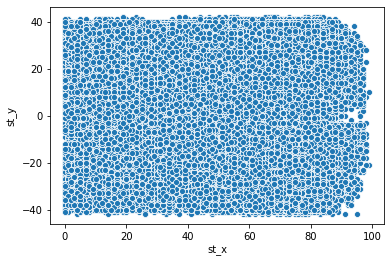

In [11]:
# Matplotlib version of plots. 
# df_game_plays[preferred_shot_conditions].plot.scatter(x='st_x', y='st_y')

# Seaborn Version of the plots.
sns.scatterplot(x=df_game_plays[preferred_shot_conditions]['st_x'],
                y=df_game_plays[preferred_shot_conditions]['st_y'])


plt.show()

# Note: Only run one of matplotlib or seabron versions of the plots.

We can see here that this is basically the shape of half of an NHL rink (rounded corners).

We also see that we can't really take shots from inside the net which explains that little white area in the middle near 100 st_x and 0 st_y.

Let's take a look at hexbin (in matplotlib) plot to see the frequency where shots are taken, because this is just a big blob blue dots.

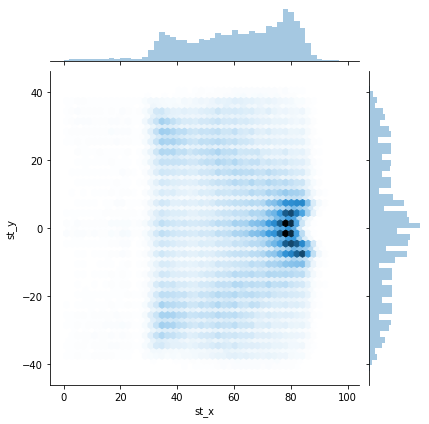

In [12]:
# Matplotlib hexplot
# df_game_plays[preferred_shot_conditions].plot.hexbin(x='st_x', y='st_y', gridsize=25, )

# Seaborn hexplot
sns.jointplot(df_game_plays[preferred_shot_conditions].st_x, df_game_plays[preferred_shot_conditions].st_y, kind="hex")

plt.show()

In [13]:
# Shows the range of how long it is on the x axis
# This is going to be half of the rink (offensive side.)
df_game_plays.st_x.min()
df_game_plays.st_x.max()


99.0

In [14]:
# Show the range on the y axis
# This is going to be the width of the rink (on each side of zero.)
df_game_plays.st_y.max()
df_game_plays.st_y.min()

-42.0

## NHL Home plate shots (high danger scoring chances)

Below we're going to take the knowledge that we just learned (what we're about to learn) to take a look at what is the percentage of shots that go in the home plate area vs outside the home plate area.

Below we're creating a function to check to see if a given point is in the home plate.


### Example of what our highdanger chance looks like

What does the home plate area look like? The homeplate area is the trapezoid in front of the net.

![scoring area](images/scoring-chance-zone-rotate.jpg)
Source: https://edmontonjournal.com/sports/hockey/nhl/cult-of-hockey/how-scoring-chances-should-be-counted

### NHL Rink Dimensions

##### Rink Dimensions
https://www.researchgate.net/figure/Standard-ice-rink-in-North-America-with-dimensions-in-feet-imperial-unit_fig8_309175794

##### Goal Crease Dimensions
https://www.researchgate.net/figure/Standard-ice-hockey-goal-and-crease-with-dimensions-used-for-the-rehabilitation-exercises_fig1_235604306

##### My calculations

Here's below is the calculation for my home plate. 

I'm hypothesizing that there's a "jam area" where the sides would score, this would only go to the trapezoid.

Below is the length dimensions (back board is zero)
- 11 feet from the back is the goal.
- 11+20+15 = 46 feet is the top of the circle (top of home plate)
- 11+20 = 31 feet is the bottom of the circle (bottom of the plate)

Below is the width dimensions of the goal crease
- 3 feet from center (on each side) as center of goal is zero
- 22 feet is the width from the center of the ice to the faceoff dot.


In [15]:
home_plate_max_length = 46 # this is the topmost part of the home plate
home_plate_mid_length = 31 # this is the start of the line to the end 
home_plate_min_length = 11 # this where the goal is.
home_plate_min_width = 3 # plus or minus since the goal is 6 feet.
home_plate_max_width = 22 # this is to the dots.
half_length_of_rink = 100
# points will be in x and y
triangle_points_length = [
    {"x": half_length_of_rink - home_plate_mid_length,
    "y": home_plate_min_width},
    {"x": half_length_of_rink - home_plate_mid_length,
    "y": home_plate_max_width},
    {"x": half_length_of_rink - home_plate_min_length,
    "y": home_plate_min_width} 
]


# a function which checks to see if a point is in a triangle.
def is_in_triangle(x_test, y_test, x_one, y_one, x_two, y_two, x_three, y_three):
    as_x = x_test-x_one
    as_y = y_test-y_test

    c1 = (x_two-x_one)*(y_test-y_one)-(y_two-y_one)*(x_test-x_one)
    c2 = (x_three-x_two)*(y_test-y_two)-(y_three-y_two)*(x_test-x_two)
    c3 = (x_one-x_three)*(y_test-y_three)-(y_one-y_three)*(x_test-x_three)
    if (c1<0 and c2<0 and c3<0) or (c1>0 and c2>0 and c3>0):
        return True
    return False
    
def is_in_home_plate(row):
    x = row['st_x']
    y = row['st_y']
    
    # check if in top rectangle (top of circle to dots)
    if ((y<= home_plate_max_width and y>= -home_plate_max_width)
        and (x >= (half_length_of_rink - home_plate_max_length)
             and x <=  (half_length_of_rink - home_plate_mid_length))):
        return True
    
    # check if bottom rectangle (net to dots)
    if ((y<= home_plate_min_width and y>= -home_plate_min_width)
        and (x >= (half_length_of_rink - home_plate_mid_length)
             and x <=  (half_length_of_rink - home_plate_min_length))):
        return True
    
    # check to see if is in the trangle above zero
    if (is_in_triangle(x, y,
                       triangle_points_length[2]["x"], triangle_points_length[2]["y"],
                       triangle_points_length[1]["x"], triangle_points_length[1]["y"],
                       triangle_points_length[0]["x"], triangle_points_length[0]["y"])):
            return True
    
    # check to see if is in the trangle below zero
    if (is_in_triangle(x, y,
                       triangle_points_length[2]["x"], -triangle_points_length[2]["y"],
                       triangle_points_length[1]["x"], -triangle_points_length[1]["y"],
                       triangle_points_length[0]["x"], -triangle_points_length[0]["y"])):
            return True
             
    
    return False


### Creating a new column on our dataset.

Now that we have this function created what we can do with pandas is create a column (true or false) to tell us if a shot is in the home plate or not.

The "apply" function on a data frame allows us to apply a function along an axis. In this case we're going to create a column called is_in_homeplate. 

We don't really care about the rows that aren't our preferred_shot_locations currently so we're just going to apply our data rows that apply.

Note: axis=1 as an argument specifies that we're going to apply this to each row. If it were zero we'd apply to each column, which we're not interested in right now.

In [16]:
df_game_plays['is_in_homeplate'] = df_game_plays[preferred_shot_conditions].apply(
    lambda row: is_in_home_plate(row), axis=1
)


In [17]:
df_game_plays.loc[preferred_shot_conditions, ['event', 'st_x', 'st_y', 'description', 'is_in_homeplate']].head()

,event,st_x,st_y,description,is_in_homeplate
6,Shot,80.0,-3.0,Patrik Elias Wrist Shot saved by Ilya Bryzgalov,True
11,Shot,88.0,-4.0,Ryan Carter Wrap-around saved by Ilya Bryzgalov,False
12,Shot,81.0,-27.0,Stephen Gionta Wrist Shot saved by Ilya Bryzgalov,False
15,Goal,73.0,11.0,"Zach Parise (3) Wrist Shot, assists: Patrik El...",True
24,Shot,63.0,-19.0,Travis Zajac Snap Shot saved by Ilya Bryzgalov,True


Now that we have our "home_plate" defined and we have a column for it we can see if there's a 

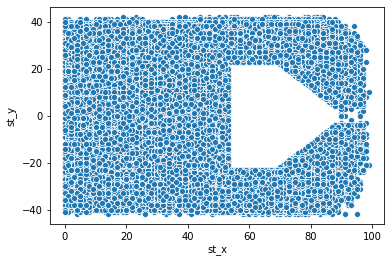

In [18]:
# Add the "is_in_homeplate" to our preferred_shot_conditions.
preferred_shot_conditions = ((df_game_plays.event.str.match('Shot|Goal'))
                             & (df_game_plays.st_x >= 0)
                             & (df_game_plays.is_in_homeplate == False) # invert this to show home plate
                            )

# this is going to show the scatter plot of shots.

# Matplotlib version
# df_game_plays[preferred_shot_conditions].plot.scatter(x='st_x', y='st_y', style='o')

# Seaborn Version of the plots.
sns.scatterplot(x=df_game_plays[preferred_shot_conditions]['st_x'],
                y=df_game_plays[preferred_shot_conditions]['st_y'])



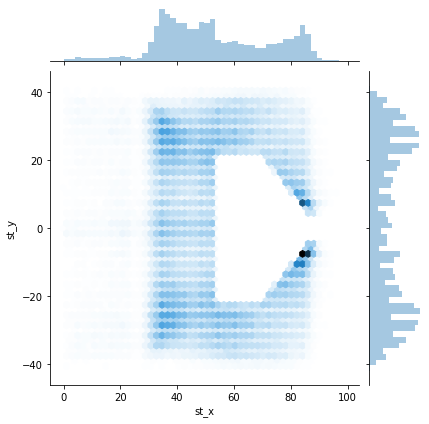

In [19]:
# Matplotlib heatmap plot.
# you can also shot the hexbin to see that there are a lot of shots from the point and beside the net.
# df_game_plays[preferred_shot_conditions].plot.hexbin(x='st_x', y='st_y', gridsize=25, )

# Seaborn Version of the plots.
sns.jointplot(x=df_game_plays[preferred_shot_conditions]['st_x'],
              y=df_game_plays[preferred_shot_conditions]['st_y'],
              kind="hex")

# Takes a super long time to create
# sns.jointplot('st_x',
#               'st_y',
#               data=df_game_plays[preferred_shot_conditions],
#               kind="kde",color='green')


plt.show()

The above shows that our filtering on the homeplate area is working as we intended. 

### Grouping Data together to see some shooting percentages

Let's get some shooting percentages.

We have our preferred_shot_conditions filter to just filter shots and goals.

We can get the the "value_count" of goals that happen (or don't) inside and outside the home plate area.

Below we're going to use the "group_by" function to group the events "Shot" or "Goal" and get the sum of the values using the value_counts() function on the "is_in_homeplate" column.

[]

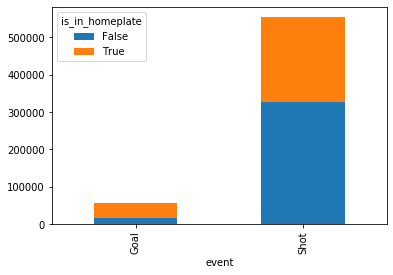

In [20]:
# basically reset the conditions to normal.
preferred_shot_conditions = ((df_game_plays.event.str.match('Shot|Goal'))
                             & (df_game_plays.st_x >= 0)
                            )
# Use groupby to get the value counts.
home_plate_values = df_game_plays[preferred_shot_conditions].groupby(
    df_game_plays.event
).is_in_homeplate.value_counts()


# Matplotlib
home_plate_values.unstack().plot(kind="bar", stacked=True)
plt.plot()

# Seaborn
# Will be adding this soon. A little bit convoluted.


This is a handy graph, but I think it would be handier if we should values "flipped" where we change the columns and rows and inverted the table. You can do this with "transpose"

Below shows the values that we've filtered and grouped together.

In [21]:
# shows the 

home_plate_values.unstack()

is_in_homeplate,False,True
event,,
Goal,15229,40940
Shot,327876,226652


Now by using transpose we can see that we "flip" the columns and rows. so we can get a better graph.

In [22]:
home_plate_values.unstack().transpose()

event,Goal,Shot
is_in_homeplate,,
False,15229,327876
True,40940,226652


Now by graphing this below, we can already see that that this is tells us a bit more.

- A lot of shots happen in this area even though it's a fairly small piece of ice.
- A higher percentage of goals go in when you're in the home plate.

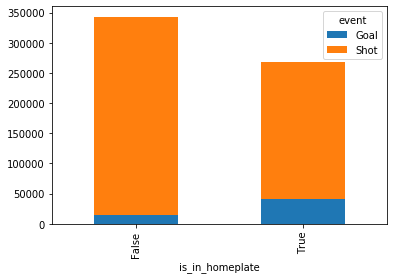

In [23]:

# Matplot lib chart
home_plate_values.unstack().transpose().plot(kind="bar", stacked=True)

## Get the shooting percentage

Now by getting the values transposed, we can calculate the percentage of shots that go in.

Below our original data.

In [24]:

test_home_plate_data = home_plate_values.unstack().transpose()

test_home_plate_data.head()

event,Goal,Shot
is_in_homeplate,,
False,15229,327876
True,40940,226652


Now we can create another column called "shooting_percentage" which will calculate the percentage with the following formula:

shooting_percentage = goals/(shots + goals)

In [25]:
test_home_plate_data['shooting_percentage'] = (test_home_plate_data['Goal'] / (test_home_plate_data['Goal'] + test_home_plate_data['Shot']))*100 

test_home_plate_data.head()

event,Goal,Shot,shooting_percentage
is_in_homeplate,,,
False,15229,327876,4.438583
True,40940,226652,15.299411


Let's see it in a bar plot!

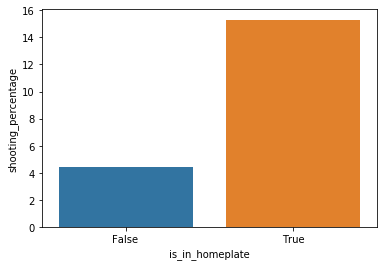

In [27]:
# show the plot

# Matplotlib
# test_home_plate_data['shooting_percentage'].plot(kind="bar", color=['red', 'green'])

# Seaborn (not stacked bar plots are pretty easy to create)
sns.barplot(x=test_home_plate_data.index, y=test_home_plate_data['shooting_percentage'])

In the last piece here we can do another groupby to take a look at the different shot types to see how effective they are in a game.

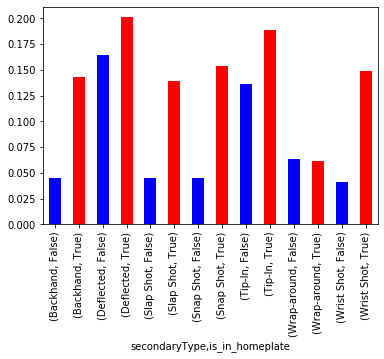

In [32]:
preferred_shot_conditions = ((df_game_plays.event.str.match('Shot|Goal'))
                             & (df_game_plays.st_x >= 0)
                            )
df_shot_types = df_game_plays[preferred_shot_conditions].groupby(
    [df_game_plays.secondaryType, df_game_plays.is_in_homeplate]
).event.value_counts().unstack()

df_shot_types['shooting_percentage'] = df_shot_types['Goal'] / (df_shot_types['Goal'] + df_shot_types['Shot'])


# Matplot lib.
df_shot_types.shooting_percentage.plot(kind="bar", color=['blue', 'red'])


In [33]:
df_shot_types

event                           Goal    Shot  shooting_percentage
secondaryType is_in_homeplate                                    
Backhand      False              737   15698             0.044843
              True              4930   29479             0.143276
Deflected     False              204    1038             0.164251
              True              1526    6062             0.201107
Slap Shot     False             4467   93861             0.045430
              True              2230   13748             0.139567
Snap Shot     False             2214   46744             0.045222
              True              5997   33073             0.153494
Tip-In        False              304    1925             0.136384
              True              5033   21632             0.188749
Wrap-around   False              249    3660             0.063699
              True               200    3036             0.061805
Wrist Shot    False             7041  164943             0.040940
              True             21003  119616             0.149361

## Conclusion

### Analysis
Here are a few insights that we might have learned 
1. We see that shots are not only a bit more effective, but way more effective when you're shooting from the home plate area. So perhaps on a line you'd like some grinder that will just slash at the goalie so that he can score.
2. NHL 95 lied to us, wrap arounds really aren't that effective.
3. Wrist shots and snapshots saw the biggest drop off of shooting percentage when taking those types of shots outside of the homeplate area.

There's a lot more that we can do from this such as taking this data and separating it out season by season, and there's a lot more I want to do with this, feedback is appreciated.


### To do next or ideas if you want to go further.

- take a look at season by season shot analysis view.
- take a look at the type of game situation (is the game tied or is it a blow out)
- take a look at the situation of the game is it a powerplay? is it a penalty kill?

### What you might have learned
Hopefully you've learned a little bit of the following from this presentation.
- running jupyter notebooks
- importing data with pandas from csv files
- filtering rows and columns in a dataset using loc
- creating a new column in our dataframe using apply.
- using groupby to group common values together.
- visualizing with matplotlib.

Thanks!
